<a href="https://colab.research.google.com/github/felixgper/Mercadona/blob/master/Mercadona.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Proyecto: Comportamiento de ventas en el Mercadona **

---

## Descripción

Este es otro de los proyectos en busca de una mejor optimizacion de un proyecto, relacionado a ventas, en donde se buscará usar los distinto modelos aprendidos para un mejor rendimiento como mejor resultados.

Con esto esta demás decir que facilitaremos la toma de decisiones.

---

## Preguntas/Problema que buscamos resolver

El objetivo principal es conocer las distintas maneras que se tiene para hacer una buena clausterizacion, entre ello nos haremos las sguientes preguntas:

- ¿Cual es la categoría que mas vende del Mercadona?
- ¿Cual es el articulo que mas ingresos tuvo?
- ¿Cual es el articulo que mas se vendió?
- ¿Que relación hay del producto que mas se vendió con el que mas ingresos tuvo?

Este es un proyecto mas identificado para todos aquellos que deseen mejorar la toma de decisiones de una compañia como distintas estrategias comerciales para el aumento de ventas.

---



Autor: Felix Gonzales Servan

Contacto: felixgonzales94@gmail.com

# 2. IMPORTACION DE LIBRERIAS

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import f1_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, f1_score, precision_recall_curve, roc_curve, auc
from sklearn.preprocessing import StandardScaler
from google.colab import files
import io
import joblib

In [2]:
uploaded = files.upload()

Saving mercadona.csv to mercadona.csv


In [3]:
print(uploaded.keys())

dict_keys(['mercadona.csv'])


In [4]:
df = pd.read_csv(next(iter(uploaded)), delimiter=',')

In [5]:
# Definición de colores y estilo
sns.set_palette("pastel")
sns.set_style("whitegrid")

plt.style.use('ggplot')
colors = [
    '#4C72B0',  # Azul
    '#55A868',  # Verde
    '#C44E52',  # Rojo
    '#8172B2',  # Morado
    '#CCB974',  # Amarillo
    '#64B5CD',  # Azul claro
]
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=colors)

In [6]:
# Convertir la columna 'insert_date' a datatime
df['insert_date'] = pd.to_datetime(df['insert_date'])

# Separamos la fecha y hora en columnas distintas
df['fecha'] = df['insert_date'].dt.date
df['time'] = df['insert_date'].dt.time

# Eliminamos la columna original; ya que no es necesaria
df.drop(columns=['insert_date'], inplace=True)

# 3. ANALISIS EXPLORATORIO DE DATOS

---

Las varibles del conjunto son:

* id : Identificado de cada artículo del mercadona.

* supermarket : Supermercado que estamos evaluando

* category : Categoria del producto

* name : Nombre del artículo

* price : Precio vendido del artículo

* reference_price : Referencia del precio de cada artículo

* reference_unit : Unidad de referencia de cada artículo

* fecha : Fecha de la transacción

* time : Hora de la transacción

# 3.1. Información general del conjunto de datos

---

In [7]:
# Verificar si existen datos duplicados
duplicados = df.duplicated().unique()
print('Valores duplicados: \n', duplicados)

print('-------------------------------------------------------------------')

# Tamaño de nuestro conjunto de datos
shape = df.shape
print('El tamaño de nuestro conjunto de datos (fila x columna): \n', shape)

print('-------------------------------------------------------------------')

# Verificar si hay nulos en nuestro conjunto de datos
nulos = df.isnull().sum()
print('Valores nulos en nuestro conjunto de datos: \n', nulos)

print('-------------------------------------------------------------------')

# Tipo de datos de cada variable
types = df.dtypes
print('Tipos de nuestro conjunto de datos: \n', types)

print('-------------------------------------------------------------------')

# Nombre de las variables
columnas = df.columns
print('Nombre de nuestras columnas: \n', columnas)

print('-------------------------------------------------------------------')

# Estadísticas descriptivas de nuestras variables numéricas
df_intcols = df.select_dtypes(exclude='object')
estadisticas = df_intcols.describe().round(2)

print("\nEstadísticas descriptivas: \n", estadisticas)

# Frecuencia de valores únicos en las variables categóricas
for col in df.select_dtypes(include='object').columns:
    print("\nFrecuencia de valores únicos de", col)
    print(df[col].value_counts())

Valores duplicados: 
 [False]
-------------------------------------------------------------------
El tamaño de nuestro conjunto de datos (fila x columna): 
 (1003020, 9)
-------------------------------------------------------------------
Valores nulos en nuestro conjunto de datos: 
 id                 0
supermarket        0
category           0
name               0
price              0
reference_price    0
reference_unit     0
fecha              0
time               0
dtype: int64
-------------------------------------------------------------------
Tipos de nuestro conjunto de datos: 
 id                   int64
supermarket         object
category            object
name                object
price              float64
reference_price    float64
reference_unit      object
fecha               object
time                object
dtype: object
-------------------------------------------------------------------
Nombre de nuestras columnas: 
 Index(['id', 'supermarket', 'category', 'name', 'pri

Segun los datos obtenido nos dimos cuenta que podemos hallar la cantidad vendidad de cada artículo. Así como el mes y semana por columnas separadas.

In [8]:
# Calcular la cantidad vendida
df['quantity_sold'] = (df['price'] / df['reference_price']).round(3)

# Agregamos las columnas de mes y semana:
df['fecha'] = pd.to_datetime(df['fecha'])
df['month'] = df['fecha'].dt.month
df['week'] = df['fecha'].dt.isocalendar().week

# 3.2. Análisis de Distribución

---

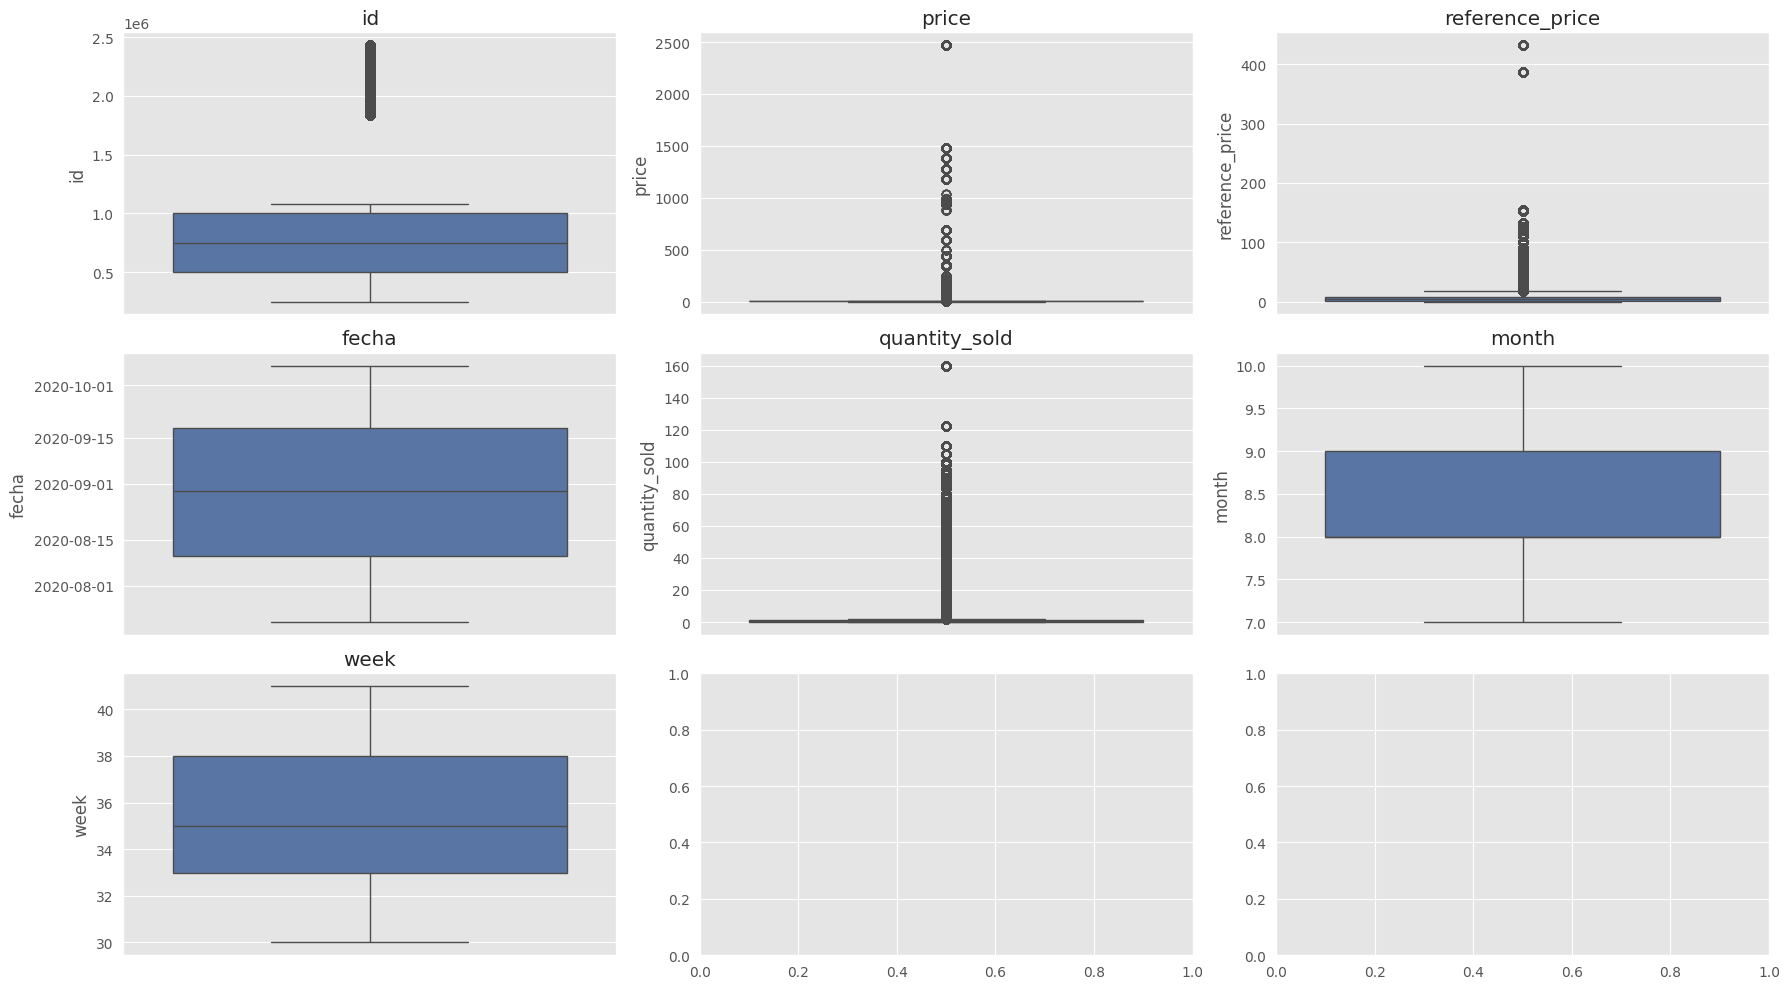

In [9]:
int_cols = df.select_dtypes(exclude='object').columns

nplots = len(int_cols)
nrows = 3

cols = nplots // nrows + (nplots % nrows > 0)

fig, axs = plt.subplots(nrows= nrows, ncols= cols, figsize = (18,10))

for i, col in enumerate(int_cols):
    ax = axs[i // cols , i % cols] if nrows > 1 else axs[i % cols]
    sns.boxplot(data = df, y = col, ax = ax)
    ax.set_title(col)
plt.tight_layout()
plt.show()

# 3.3. Hallando la correlación

---

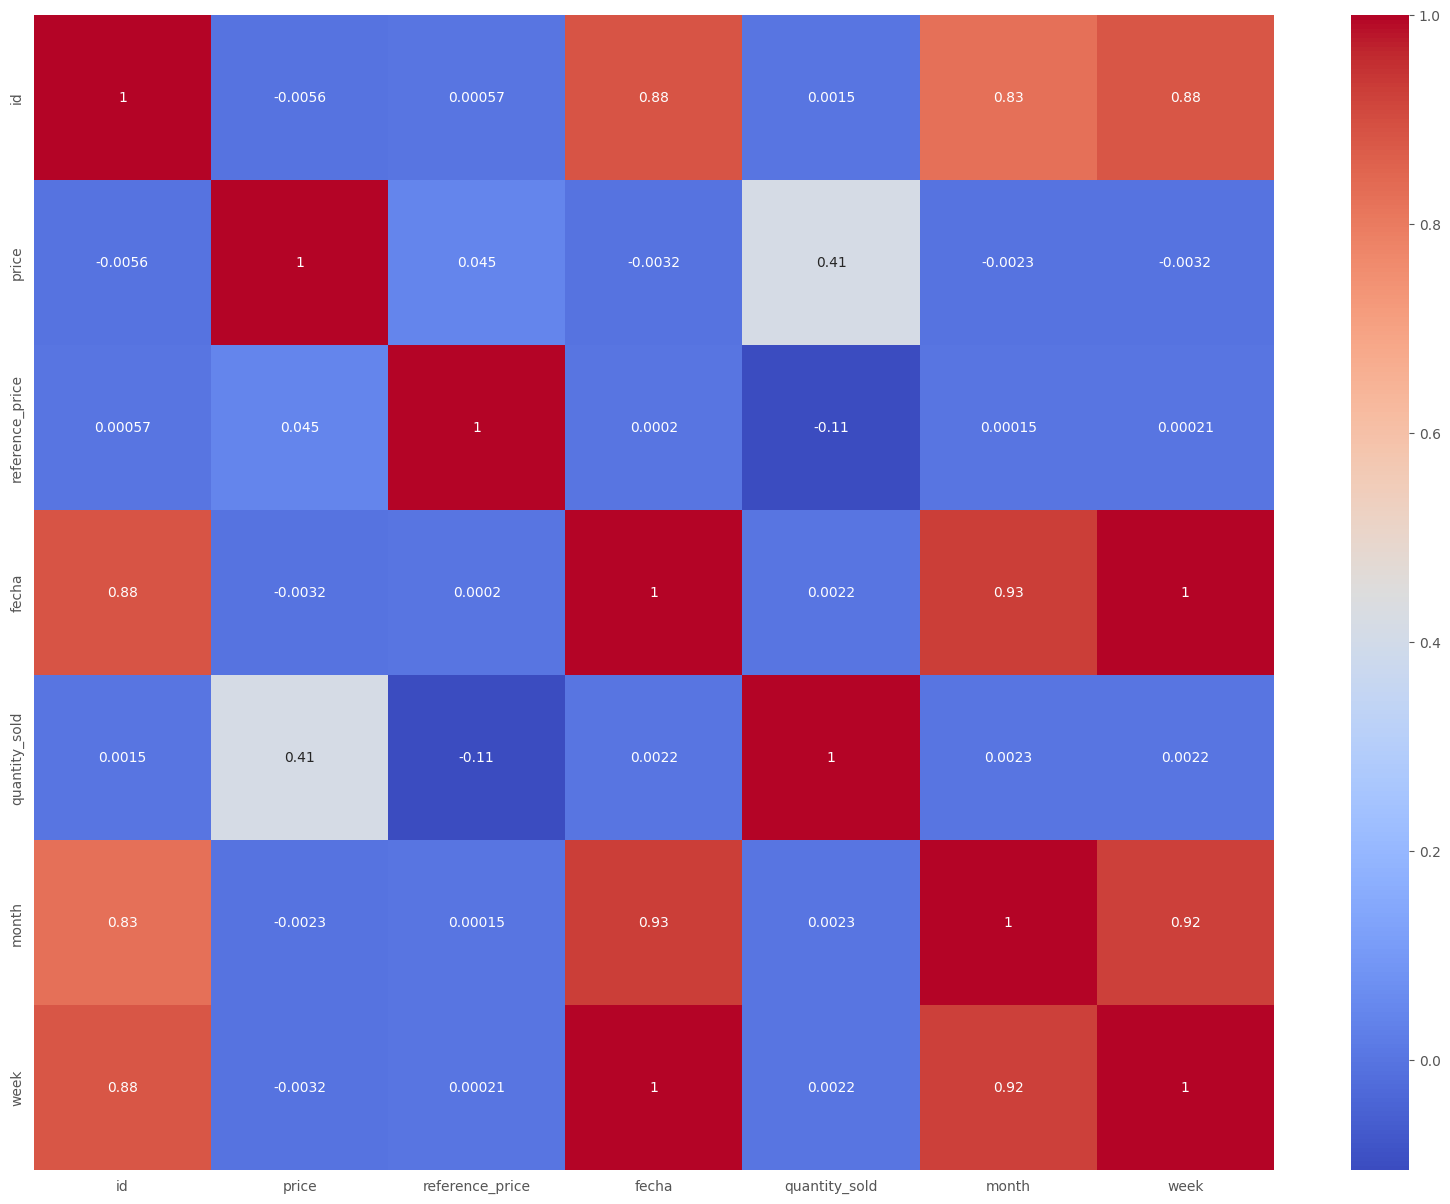

In [10]:
fig = plt.figure(figsize=(20,15))
sns.heatmap(data = df[int_cols].corr(), annot= True, annot_kws={'size' : 10}, cmap='coolwarm')
plt.show()

# 3.4. Distribución de variables categóricas

---

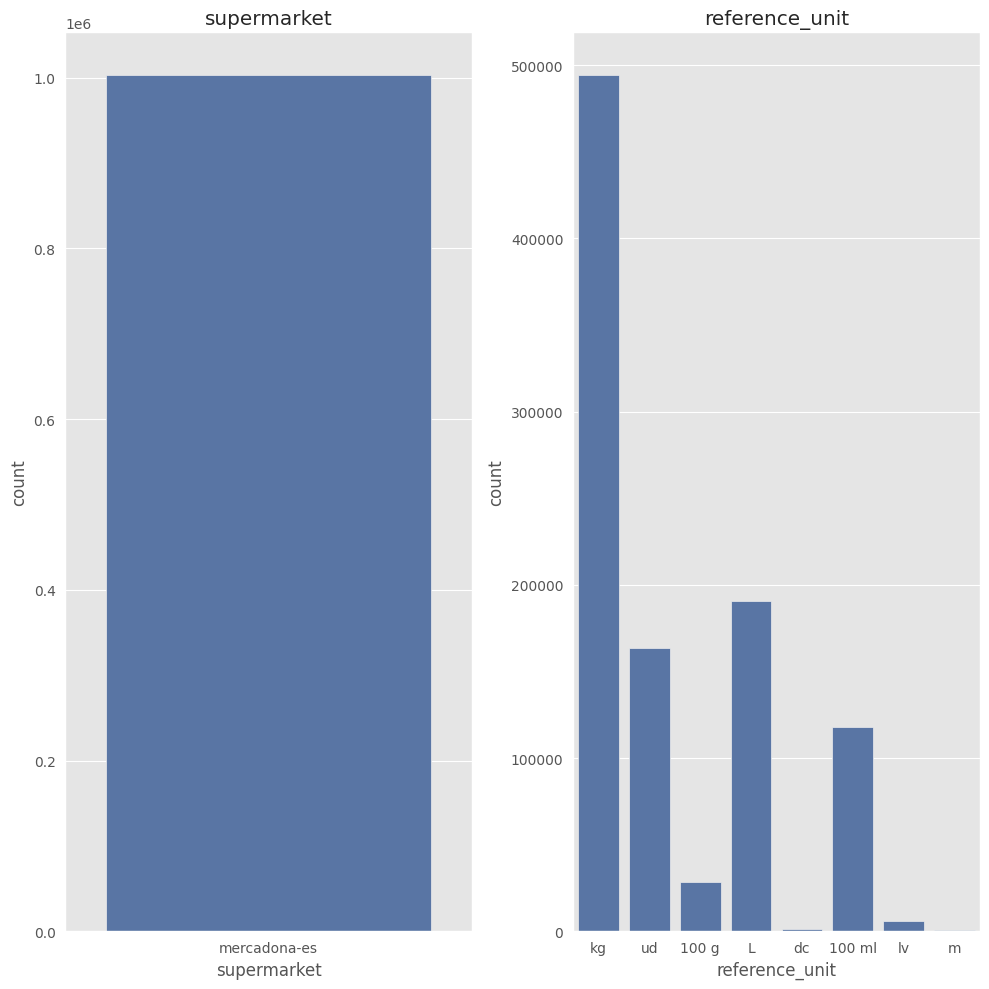

In [11]:
# Como 'category' y 'name' son datos extremadamente grandes, no se visualizará en el grafico de variables categóricas.
# Asi mismo por el tiempo tardío que estas dos variables demoran para el análisis.
cat_cols = df[['supermarket', 'reference_unit']].columns

nplots = len(cat_cols)
nrows = 1

cols = nplots // nrows + (nplots % nrows > 0)

fig , axs = plt.subplots(nrows= nrows, ncols= cols, figsize = (10,10))

for i, col in enumerate(cat_cols):
    ax = axs[i // cols , i % cols] if nrows > 1 else axs[i % cols]
    sns.countplot(data = df, x = col, ax = ax)
    ax.set_title(col)
plt.tight_layout()
plt.show()

Acá hacemos una pausa porque el hallar la gráfica por categoría puede llevarnos a un gráfico muy grande, el cual puede ocasionar díficil interpretación. Lo más óptimo que se buscó es poner 2 'MAIN_GROUP', uno donde este todo lo relacionado a food y a non-food.

In [15]:
category_to_main_group = {
    # Food categories
    'fruta': 'food',
    'lechuga_y_ensalada_preparada': 'food',
    'verdura': 'food',
    'pescado_fresco': 'food',
    'marisco': 'food',
    'pescado_en_bandeja': 'food',
    'pescado_congelado': 'food',
    'salazones_y_ahumados': 'food',
    'cerdo': 'food',
    'aves_y_pollo': 'food',
    'vacuno': 'food',
    'conejo_y_cordero': 'food',
    'embutido': 'food',
    'hamburguesas_y_picadas': 'food',
    'empanados_y_elaborados': 'food',
    'golosinas': 'food',
    'arreglos': 'food',
    'carne_congelada': 'food',
    'aves_y_jamon_cocido': 'food',
    'chopped_y_mortadela': 'food',
    'jamon_serrano': 'food',
    'embutido_curado': 'food',
    'bacon_y_salchichas': 'food',
    'queso_untable_y_fresco': 'food',
    'queso_curado_semicurado_y_tierno': 'food',
    'queso_lonchas_rallado_y_en_porciones': 'food',
    'especias': 'food',
    'pate_y_sobrasada': 'food',
    'pan_de_horno': 'food',
    'pan_de_molde_y_otras_especialidades': 'food',
    'pan_tostado_y_rallado': 'food',
    'picos_rosquilletas_y_picatostes': 'food',
    'bolleria_de_horno': 'food',
    'bolleria_envasada': 'food',
    'tartas_y_pasteles': 'food',
    'harina_y_preparado_reposteria': 'food',
    'velas_y_decoracion': 'non-food',
    'leche_y_bebidas_vegetales': 'food',
    'mantequilla_y_margarina': 'food',
    'huevos': 'food',
    'cereales': 'food',
    'tortitas': 'food',
    'galletas': 'food',
    'cafe_capsula_y_monodosis': 'food',
    'cafe_molido_y_en_grano': 'food',
    'cafe_soluble_y_otras_bebidas': 'food',
    'cacao_soluble_y_chocolate_a_la_taza': 'food',
    'te_e_infusiones': 'food',
    'azucar_y_edulcorante': 'food',
    'mermelada_y_miel': 'food',
    'chocolate': 'food',
    'chicles_y_caramelos': 'food',
    'tomate_y_otros_sabores': 'food',
    'fruta_variada': 'food',
    'melocoton_y_pina': 'food',
    'yogures_desnatados': 'food',
    'yogures_naturales_y_sabores': 'food',
    'bifidus': 'food',
    'postres_de_soja': 'food',
    'yogures_y_postres_infantiles': 'food',
    'yogures_liquidos': 'food',
    'yogures_griegos': 'food',
    'flan_y_natillas': 'food',
    'gelatina_y_otros_postres': 'food',
    'aceite_vinagre_y_sal': 'food',
    'mayonesa_ketchup_y_mostaza': 'food',
    'agua': 'food',
    'otras_salsas': 'food',
    'arroz': 'food',
    'pasta_y_fideos': 'food',
    'legumbres': 'food',
    'atun_y_otras_conservas_de_pescado': 'food',
    'conservas_de_verdura_y_frutas': 'food',
    'berberechos_y_mejillones': 'food',
    'tomate': 'food',
    'sopa_y_caldo': 'food',
    'gazpacho_y_cremas': 'food',
    'patatas_fritas_y_snacks': 'food',
    'pizzas': 'food',
    'frutos_secos_y_fruta_desecada': 'food',
    'aceitunas_y_encurtidos': 'food',
    'platos_preparados_calientes': 'food',
    'platos_preparados_frios': 'food',
    'naranja': 'food',
    'arroz_y_pasta': 'food',
    'carne': 'food',
    'pescado': 'food',
    'tartas_y_churros': 'food',
    'helados': 'food',
    'hielo': 'food',
    'refresco_de_cola': 'food',
    'refresco_de_naranja_y_de_limon': 'food',
    'tonica_y_bitter': 'food',
    'refresco_de_te_y_sin_gas': 'food',
    'licores': 'food',
    'isotonico_y_energetico': 'food',
    'cerveza': 'food',
    'cerveza_sin_alcohol': 'food',
    'tinto_de_verano_y_sangria': 'food',
    'vino_tinto': 'food',
    'vino_blanco': 'food',
    'vino_rosado': 'food',
    'vino_lambrusco_y_espumoso': 'food',
    'sidra_y_cava': 'food',
    'cuidado_e_higiene_facial': 'non-food',
    'higiene_bucal': 'non-food',
    'gel_y_jabon_de_manos': 'non-food',
    'desodorante': 'non-food',
    'cuidado_corporal': 'non-food',
    'higiene_intima': 'non-food',
    'depilacion': 'non-food',
    'afeitado_y_cuidado_para_hombre': 'non-food',
    'manicura_y_pedicura': 'non-food',
    'perfume_y_colonia': 'non-food',
    'protector_solar_y_aftersun': 'non-food',
    'champu': 'non-food',
    'acondicionador_y_mascarilla': 'non-food',
    'fijacion_cabello': 'non-food',
    'coloracion_cabello': 'non-food',
    'peines_y_accesorios': 'non-food',
    'bases_de_maquillaje_y_corrector': 'non-food',
    'colorete_y_polvos': 'non-food',
    'labios': 'non-food',
    'ojos': 'non-food',
    'pinceles_y_brochas': 'non-food',
    'fitoterapia': 'non-food',
    'parafarmacia': 'non-food',
    'alimentacion_infantil': 'food',
    'toallitas_y_panales': 'non-food',
    'higiene_y_cuidado': 'non-food',
    'biberon_chupete_y_menaje': 'non-food',
    'perro': 'non-food',
    'gato': 'non-food',
    'pez_y_otros': 'non-food',
    'detergente_y_suavizante_ropa': 'non-food',
    'limpieza_vajilla': 'non-food',
    'limpieza_cocina': 'non-food',
    'limpieza_bano_y_wc': 'non-food',
    'limpieza_muebles_y_multiusos': 'non-food',
    'limpiahogar_y_friegasuelos': 'non-food',
    'lejia_y_liquidos_fuertes': 'non-food',
    'limpiacristales': 'non-food',
    'estropajo_bayeta_y_guantes': 'non-food',
    'papel_higienico_y_celulosa': 'non-food',
    'pilas_y_bolsas_de_basura': 'non-food',
    'insecticida_y_ambientador': 'non-food',
    'menaje_y_conservacion_de_alimentos': 'non-food',
    'utensilios_de_limpieza_y_calzado': 'non-food',
    'neceseres': 'non-food',
    'sushi': 'food',
    'rebozados': 'food',
    'aceite_especias_y_salsas_aceite_vinagre_y_sal': 'food',
    'aceite_especias_y_salsas_especias': 'food',
    'aceite_especias_y_salsas_otras_salsas': 'food',
    'aceite_especias_y_salsas_mayonesa_ketchup_y_mostaza': 'food',
    'patatas_fritas_y_frutos_secos_frutos_secos_y_fruta_desecada': 'food',
    'patatas_fritas_y_frutos_secos_patatas_fritas_y_snacks': 'food',
    'patatas_fritas_y_frutos_secos_aceitunas_y_encurtidos': 'food',
    'arroz_y_pasta_pasta_y_fideos': 'food',
    'arroz_y_pasta_arroz': 'food',
    'legumbres_legumbres': 'food',
    'carniceria_hamburguesas_y_picadas': 'food',
    'carniceria_vacuno': 'food',
    'carniceria_cerdo': 'food',
    'carniceria_conejo_y_cordero': 'food',
    'carniceria_embutido': 'food',
    'carniceria_aves_y_pollo': 'food',
    'carniceria_empanados_y_elaborados': 'food',
    'pastas': 'food',
    'verduras': 'food',
    'bebidas_agua': 'food',
    'bebidas_refresco_de_cola': 'food',
    'bebidas_refresco_de_naranja_y_de_limon': 'food',
    'bebidas_tonica_y_bitter': 'food',
    'bebidas_isotonico_y_energetico': 'food',
    'bebidas_refresco_de_te_y_sin_gas': 'food',
    'bebidas_licores': 'food',
    'bebidas_vino_tinto': 'food',
    'bebidas_vino_rosado': 'food',
    'bebidas_vino_blanco': 'food',
    'bebidas_sidra_y_cava': 'food',
    'bebidas_vino_lambrusco_y_espumoso': 'food',
    'bebidas_tinto_de_verano_y_sangria': 'food',
    'bebidas_cerveza': 'food',
    'bebidas_cerveza_sin_alcohol': 'food',
    'azucar_y_endulzantes_azucar_y_edulcorante': 'food',
    'azucar_y_endulzantes_mermelada_y_miel': 'food',
    'conservas_conservas_de_verdura_y_frutas': 'food',
    'conservas_atun_y_otras_conservas_de_pescado': 'food',
    'conservas_berberechos_y_mejillones': 'food',
    'conservas_tomate': 'food',
    'yogures': 'food',
    'bifidus': 'food',
    'yogures_liquidos': 'food',
    'yogures_y_postres_infantiles': 'food',
    'yogures_y_liquidos_yogures_desnatados': 'food',
    'yogures_y_liquidos_yogures_griegos': 'food',
    'yogures_y_liquidos_bifidus': 'food',
    'yogures_y_liquidos_postres_de_soja': 'food',
    'yogures_y_liquidos_yogures_naturales_y_sabores': 'food',
    'yogures_y_liquidos_flan_y_natillas': 'food',
    'yogures_y_liquidos_gelatina_y_otros_postres': 'food',
    'queso': 'food',
    'arroz_legumbres_pastas_legumbres': 'food',
    'arroz_legumbres_pastas_arroz': 'food',
    'arroz_legumbres_pastas_pasta_y_fideos': 'food',
    'zumos': 'food',
    'pizzas_y_comida_internacional_pizzas': 'food',
    'pizzas_y_comida_internacional_sushi': 'food',
    'pizzas_y_comida_internacional_gazpacho_y_cremas': 'food',
    'productos_congelados_pescado_congelado': 'food',
    'productos_congelados_carne_congelada': 'food',
    'productos_congelados_pizzas': 'food',
    'productos_congelados_platos_preparados_calientes': 'food',
    'productos_congelados_helados': 'food',
    'productos_congelados_hielo': 'food',
    'desayuno_y_merienda_bolleria_de_horno': 'food',
    'desayuno_y_merienda_bolleria_envasada': 'food',
    'desayuno_y_merienda_galletas': 'food',
    'desayuno_y_merienda_cereales': 'food',
    'desayuno_y_merienda_cacao_soluble_y_chocolate_a_la_taza': 'food',
    'desayuno_y_merienda_chocolate': 'food',
    'desayuno_y_merienda_chicles_y_caramelos': 'food',
    'desayuno_y_merienda_pate_y_sobrasada': 'food',
    'desayuno_y_merienda_mermelada_y_miel': 'food',
    'desayuno_y_merienda_harina_y_preparado_reposteria': 'food',
    'desayuno_y_merienda_tartas_y_pasteles': 'food',
    'cuidado_personal_champu': 'non-food',
    'cuidado_personal_acondicionador_y_mascarilla': 'non-food',
    'cuidado_personal_fijacion_cabello': 'non-food',
    'cuidado_personal_peines_y_accesorios': 'non-food',
    'cuidado_personal_coloracion_cabello': 'non-food',
    'cuidado_personal_gel_y_jabon_de_manos': 'non-food',
    'cuidado_personal_cuidado_corporal': 'non-food',
    'cuidado_personal_higiene_intima': 'non-food',
    'cuidado_personal_depilacion': 'non-food',
    'cuidado_personal_cuidado_e_higiene_facial': 'non-food',
    'cuidado_personal_higiene_bucal': 'non-food',
    'cuidado_personal_desodorante': 'non-food',
    'cuidado_personal_afeitado_y_cuidado_para_hombre': 'non-food',
    'cuidado_personal_perfume_y_colonia': 'non-food',
    'cuidado_personal_manicura_y_pedicura': 'non-food',
    'cuidado_personal_bases_de_maquillaje_y_corrector': 'non-food',
    'cuidado_personal_colorete_y_polvos': 'non-food',
    'cuidado_personal_labios': 'non-food',
    'cuidado_personal_ojos': 'non-food',
    'cuidado_personal_pinceles_y_brochas': 'non-food',
    'cuidado_personal_fitoterapia': 'non-food',
    'cuidado_personal_protector_solar_y_aftersun': 'non-food',
    'para-farmacia_parafarmacia': 'non-food',
    'limpieza_del_hogar_limpiahogar_y_friegasuelos': 'non-food',
    'limpieza_del_hogar_papel_higienico_y_celulosa': 'non-food',
    'limpieza_del_hogar_detergente_y_suavizante_ropa': 'non-food',
    'limpieza_del_hogar_estropajo_bayeta_y_guantes': 'non-food',
    'limpieza_del_hogar_insecticida_y_ambientador': 'non-food',
    'limpieza_del_hogar_menaje_y_conservacion_de_alimentos': 'non-food',
    'limpieza_del_hogar_lejia_y_liquidos_fuertes': 'non-food',
    'limpieza_del_hogar_utensilios_de_limpieza_y_calzado': 'non-food',
    'limpieza_del_hogar_pilas_y_bolsas_de_basura': 'non-food',
    'limpieza_del_hogar_limpieza_vajilla': 'non-food',
    'limpieza_del_hogar_limpieza_bano_y_wc': 'non-food',
    'limpieza_del_hogar_limpieza_muebles_y_multiusos': 'non-food',
    'limpieza_del_hogar_limpieza_cocina': 'non-food',
    'limpieza_del_hogar_limpiacristales': 'non-food',
    'mascotas_perro': 'non-food',
    'mascotas_gato': 'non-food',
    'mascotas_pez_y_otros': 'non-food',
    'bebidas_cafe_capsula_y_monodosis': 'food',
    'bebidas_cafe_molido_y_en_grano': 'food',
    'bebidas_cafe_soluble_y_otras_bebidas': 'food',
    'bebidas_te_e_infusiones': 'food',
    'productos_infantiles_biberon_chupete_y_menaje': 'non-food',
    'productos_infantiles_higiene_y_cuidado': 'non-food',
    'productos_infantiles_toallitas_y_panales': 'non-food',
    'productos_infantiles_alimentacion_infantil': 'food',
    'fruta_verdura_y_ensalada_verdura': 'food',
    'fruta_verdura_y_ensalada_fruta': 'food',
    'fruta_verdura_y_ensalada_lechuga_y_ensalada_preparada': 'food',
    'charcuteria_chopped_y_mortadela': 'food',
    'charcuteria_jamon_serrano': 'food',
    'charcuteria_embutido_curado': 'food',
    'charcuteria_bacon_y_salchichas': 'food',
    'charcuteria_aves_y_jamon_cocido': 'food',
    'pescado_y_marisco_salazones_y_ahumados': 'food',
    'pescado_y_marisco_pescado_fresco': 'food',
    'pescado_y_marisco_pescado_en_bandeja': 'food',
    'pescado_y_marisco_marisco': 'food',
    'productos_frescos_huevos': 'food',
    'productos_frescos_mantequilla_y_margarina': 'food',
    'productos_frescos_leche_y_bebidas_vegetales': 'food',
    'quesos_queso_untable_y_fresco': 'food',
    'quesos_queso_curado_semicurado_y_tierno': 'food',
    'quesos_queso_lonchas_rallado_y_en_porciones': 'food',
    'agua_y_refrescos_agua': 'food',
    'agua_y_refrescos_isotonico_y_energetico': 'food',
    'agua_y_refrescos_refresco_de_cola': 'food',
    'agua_y_refrescos_refresco_de_naranja_y_de_limon': 'food',
    'agua_y_refrescos_tonica_y_bitter': 'food',
    'agua_y_refrescos_refresco_de_te_y_sin_gas': 'food',
    'aperitivos_aceitunas_y_encurtidos': 'food',
    'aperitivos_frutos_secos_y_fruta_desecada': 'food',
    'aperitivos_patatas_fritas_y_snacks': 'food',
    'arroz_legumbres_y_pasta_arroz': 'food',
    'arroz_legumbres_y_pasta_legumbres': 'food',
    'arroz_legumbres_y_pasta_pasta_y_fideos': 'food',
    'azucar_caramelos_y_chocolate_azucar_y_edulcorante': 'food',
    'azucar_caramelos_y_chocolate_chicles_y_caramelos': 'food',
    'azucar_caramelos_y_chocolate_chocolate': 'food',
    'azucar_caramelos_y_chocolate_golosinas': 'food',
    'azucar_caramelos_y_chocolate_mermelada_y_miel': 'food',
    'bebe_alimentacion_infantil': 'food',
    'bebe_biberon_chupete_y_menaje': 'non-food',
    'bebe_higiene_y_cuidado': 'non-food',
    'bebe_toallitas_y_panales': 'non-food',
    'bodega_cerveza': 'food',
    'bodega_cerveza_sin_alcohol': 'food',
    'bodega_licores': 'food',
    'bodega_sidra_y_cava': 'food',
    'bodega_tinto_de_verano_y_sangria': 'food',
    'bodega_vino_blanco': 'food',
    'bodega_vino_lambrusco_y_espumoso': 'food',
    'bodega_vino_rosado': 'food',
    'bodega_vino_tinto': 'food',
    'cacao_cafe_e_infusiones_cacao_soluble_y_chocolate_a_la_taza': 'food',
    'cacao_cafe_e_infusiones_cafe_capsula_y_monodosis': 'food',
    'cacao_cafe_e_infusiones_cafe_molido_y_en_grano': 'food',
    'cacao_cafe_e_infusiones_cafe_soluble_y_otras_bebidas': 'food',
    'cacao_cafe_e_infusiones_te_e_infusiones': 'food',
    'carne_arreglos': 'food',
    'carne_aves_y_pollo': 'food',
    'carne_carne_congelada': 'food',
    'carne_cerdo': 'food',
    'carne_conejo_y_cordero': 'food',
    'carne_embutido': 'food',
    'carne_hamburguesas_y_picadas': 'food',
    'carne_vacuno': 'food',
    'carne_empanados_y_elaborados': 'food',
    'cereales_y_galletas_cereales': 'food',
    'cereales_y_galletas_galletas': 'food',
    'cereales_y_galletas_tortitas': 'food',
    'charcuteria_y_quesos_aves_y_jamon_cocido': 'food',
    'charcuteria_y_quesos_bacon_y_salchichas': 'food',
    'charcuteria_y_quesos_chopped_y_mortadela': 'food',
    'charcuteria_y_quesos_embutido_curado': 'food',
    'charcuteria_y_quesos_jamon_serrano': 'food',
    'charcuteria_y_quesos_pate_y_sobrasada': 'food',
    'charcuteria_y_quesos_queso_curado_semicurado_y_tierno': 'food',
    'charcuteria_y_quesos_queso_lonchas_rallado_y_en_porciones': 'food',
    'charcuteria_y_quesos_queso_untable_y_fresco': 'food',
    'congelados_arroz_y_pasta': 'food',
    'congelados_carne': 'food',
    'congelados_helados': 'food',
    'congelados_hielo': 'food',
    'congelados_marisco': 'food',
    'congelados_pescado': 'food',
    'congelados_pizzas': 'food',
    'congelados_rebozados': 'food',
    'congelados_tartas_y_churros': 'food',
    'congelados_verdura': 'food',
    'conservas_caldos_y_cremas_atun_y_otras_conservas_de_pescado': 'food',
    'conservas_caldos_y_cremas_berberechos_y_mejillones': 'food',
    'conservas_caldos_y_cremas_conservas_de_verdura_y_frutas': 'food',
    'conservas_caldos_y_cremas_gazpacho_y_cremas': 'food',
    'conservas_caldos_y_cremas_sopa_y_caldo': 'food',
    'conservas_caldos_y_cremas_tomate': 'food',
    'cuidado_del_cabello_acondicionador_y_mascarilla': 'non-food',
    'cuidado_del_cabello_champu': 'non-food',
    'cuidado_del_cabello_coloracion_cabello': 'non-food',
    'cuidado_del_cabello_fijacion_cabello': 'non-food',
    'cuidado_del_cabello_peines_y_accesorios': 'non-food',
    'cuidado_facial_y_corporal_afeitado_y_cuidado_para_hombre': 'non-food',
    'cuidado_facial_y_corporal_cuidado_corporal': 'non-food',
    'cuidado_facial_y_corporal_cuidado_e_higiene_facial': 'non-food',
    'cuidado_facial_y_corporal_depilacion': 'non-food',
    'cuidado_facial_y_corporal_desodorante': 'non-food',
    'cuidado_facial_y_corporal_gel_y_jabon_de_manos': 'non-food',
    'cuidado_facial_y_corporal_higiene_bucal': 'non-food',
    'cuidado_facial_y_corporal_higiene_intima': 'non-food',
    'cuidado_facial_y_corporal_manicura_y_pedicura': 'non-food',
    'cuidado_facial_y_corporal_neceseres': 'non-food',
    'cuidado_facial_y_corporal_perfume_y_colonia': 'non-food',
    'cuidado_facial_y_corporal_protector_solar_y_aftersun': 'non-food',
    'fitoterapia_y_parafarmacia_fitoterapia': 'non-food',
    'fitoterapia_y_parafarmacia_parafarmacia': 'non-food',
    'fruta_y_verdura_fruta': 'food',
    'fruta_y_verdura_lechuga_y_ensalada_preparada': 'food',
    'fruta_y_verdura_verdura': 'food',
    'huevos_leche_y_mantequilla_huevos': 'food',
    'huevos_leche_y_mantequilla_leche_y_bebidas_vegetales': 'food',
    'huevos_leche_y_mantequilla_mantequilla_y_margarina': 'food',
    'limpieza_y_hogar_detergente_y_suavizante_ropa': 'non-food',
    'limpieza_y_hogar_estropajo_bayeta_y_guantes': 'non-food',
    'limpieza_y_hogar_insecticida_y_ambientador': 'non-food',
    'limpieza_y_hogar_lejia_y_liquidos_fuertes': 'non-food',
    'limpieza_y_hogar_limpiacristales': 'non-food',
    'limpieza_y_hogar_limpiahogar_y_friegasuelos': 'non-food',
    'limpieza_y_hogar_limpieza_bano_y_wc': 'non-food',
    'limpieza_y_hogar_limpieza_cocina': 'non-food',
    'limpieza_y_hogar_limpieza_muebles_y_multiusos': 'non-food',
    'limpieza_y_hogar_limpieza_vajilla': 'non-food',
    'limpieza_y_hogar_menaje_y_conservacion_de_alimentos': 'non-food',
    'limpieza_y_hogar_papel_higienico_y_celulosa': 'non-food',
    'limpieza_y_hogar_pilas_y_bolsas_de_basura': 'non-food',
    'limpieza_y_hogar_utensilios_de_limpieza_y_calzado': 'non-food',
    'maquillaje_bases_de_maquillaje_y_corrector': 'non-food',
    'maquillaje_colorete_y_polvos': 'non-food',
    'maquillaje_labios': 'non-food',
    'maquillaje_ojos': 'non-food',
    'maquillaje_pinceles_y_brochas': 'non-food',
    'marisco_y_pescado_marisco': 'food',
    'marisco_y_pescado_pescado_congelado': 'food',
    'marisco_y_pescado_pescado_en_bandeja': 'food',
    'marisco_y_pescado_pescado_fresco': 'food',
    'marisco_y_pescado_salazones_y_ahumados': 'food',
    'marisco_y_pescado_sushi': 'food',
    'panaderia_y_pasteleria_bolleria_de_horno': 'food',
    'panaderia_y_pasteleria_bolleria_envasada': 'food',
    'panaderia_y_pasteleria_harina_y_preparado_reposteria': 'food',
    'panaderia_y_pasteleria_pan_de_horno': 'food',
    'panaderia_y_pasteleria_pan_de_molde_y_otras_especialidades': 'food',
    'panaderia_y_pasteleria_pan_tostado_y_rallado': 'food',
    'panaderia_y_pasteleria_picos_rosquilletas_y_picatostes': 'food',
    'panaderia_y_pasteleria_tartas_y_pasteles': 'food',
    'panaderia_y_pasteleria_velas_y_decoracion': 'non-food',
    'pizzas_y_platos_preparados_pizzas': 'food',
    'pizzas_y_platos_preparados_platos_preparados_calientes': 'food',
    'pizzas_y_platos_preparados_platos_preparados_frios': 'food',
    'postres_y_yogures_bifidus': 'food',
    'postres_y_yogures_flan_y_natillas': 'food',
    'postres_y_yogures_gelatina_y_otros_postres': 'food',
    'postres_y_yogures_postres_de_soja': 'food',
    'postres_y_yogures_yogures_desnatados': 'food',
    'postres_y_yogures_yogures_griegos': 'food',
    'postres_y_yogures_yogures_liquidos': 'food',
    'postres_y_yogures_yogures_naturales_y_sabores': 'food',
    'postres_y_yogures_yogures_y_postres_infantiles': 'food',
    'zumos_fruta_variada': 'food',
    'zumos_melocoton_y_pina': 'food',
    'zumos_naranja': 'food',
    'zumos_tomate_y_otros_sabores': 'food'
}

df['main_group'] = df['category'].map(category_to_main_group)

# 3.5. Relación de las variables categóricas y el main group

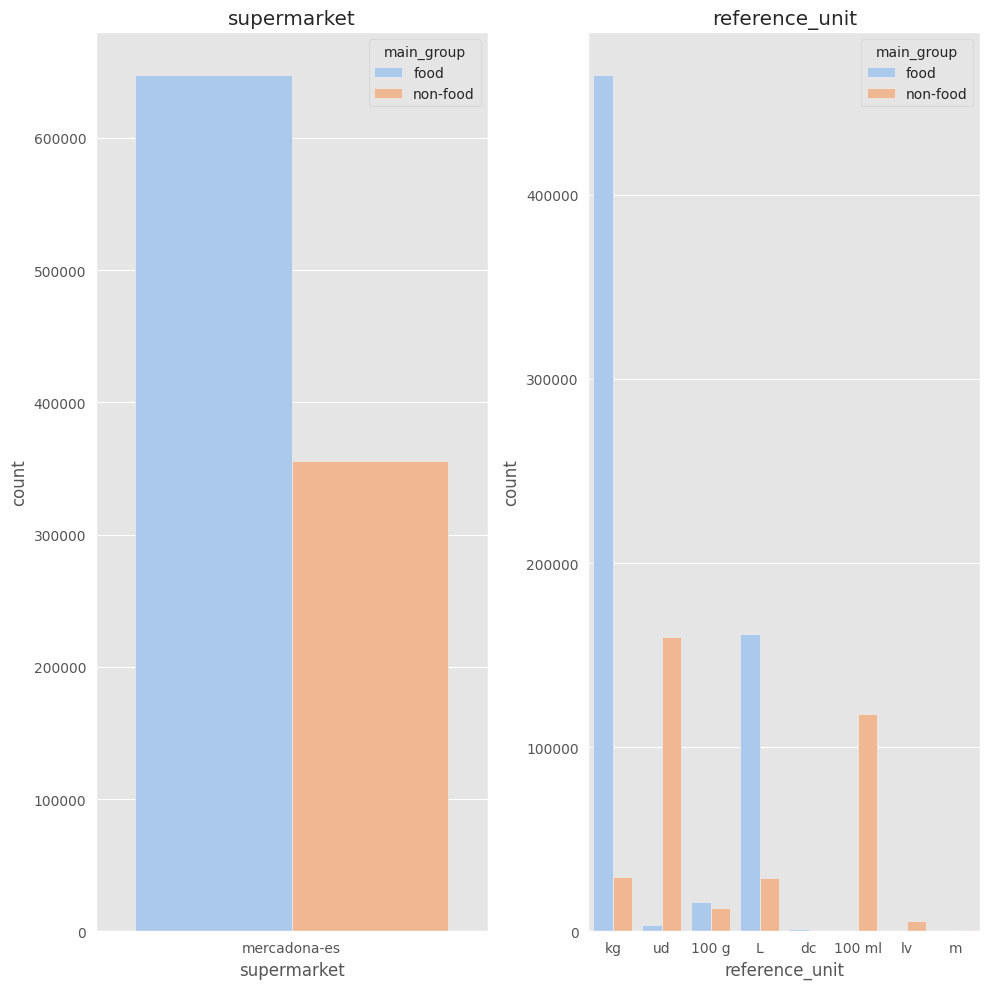

In [16]:
cat_cols = df[['supermarket', 'reference_unit']].columns

nplots = len(cat_cols)
nrows = 1

cols = nplots // nrows + (nplots % nrows > 0)

fig , axs = plt.subplots(nrows= nrows, ncols= cols, figsize = (10,10))

for i, col in enumerate(cat_cols):
    ax = axs[i // cols , i % cols] if nrows > 1 else axs[i % cols]
    sns.countplot(data = df, x = col, ax = ax, hue = 'main_group', palette='pastel')
    ax.set_title(col)
plt.tight_layout()
plt.show()

# 3.6. Distribución de variables numéricas

---

Media de price: 6.094106558194251
Media de reference_price: 6.950310163306818
Media de quantity_sold: 2.8179408207214243


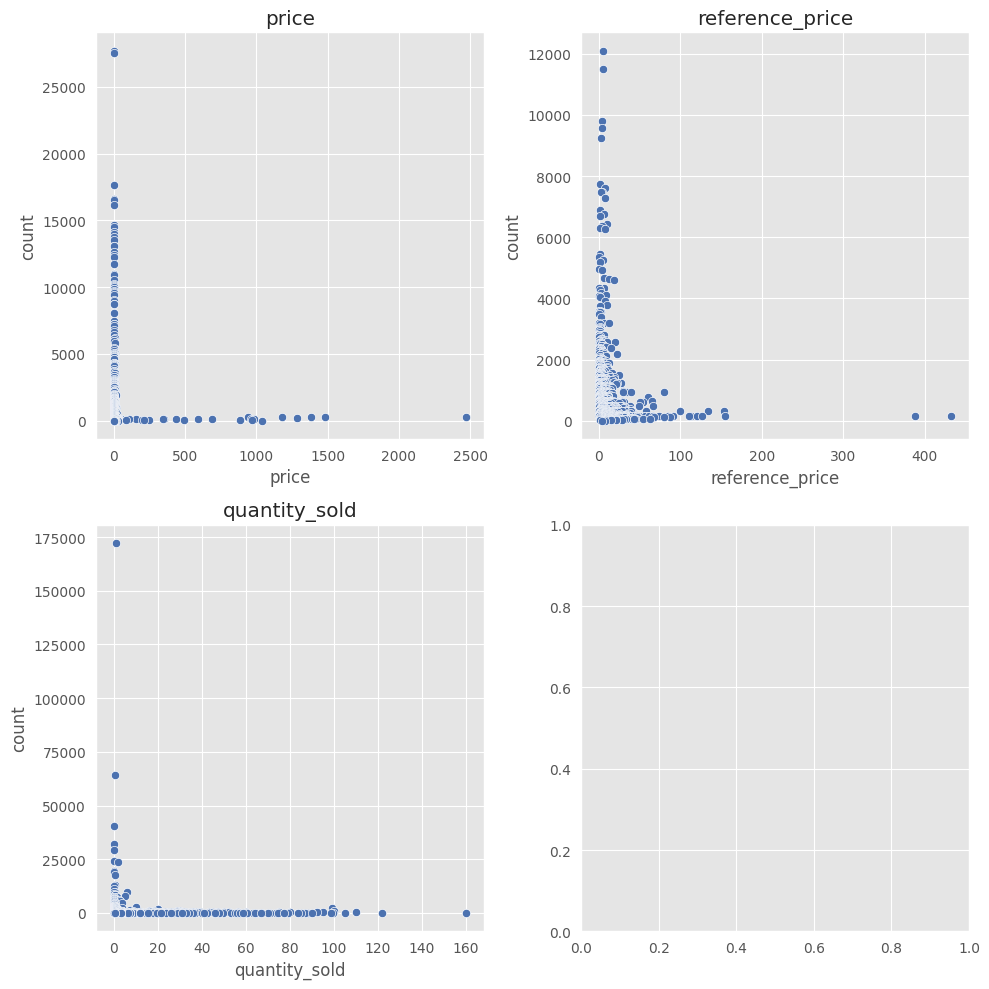

In [17]:
var_num = df[['price', 'reference_price', 'quantity_sold']].columns

nplot = len(var_num)
nrows = 2
cols = nplot // nrows + (nplot % nrows > 0)

fig, axs = plt.subplots(nrows=nrows, ncols=cols, figsize = (10,10))

for i, col in enumerate(var_num):
    ax = axs[i // cols, i % cols] if nrows > 1 else axs[i % cols]
    counts = df[col].value_counts().reset_index()
    counts.columns = [col, 'count']
    sns.scatterplot(data=counts, x=col, y='count', ax=ax)
    ax.set_title(col)
    print(f'Media de {col}: {df[col].mean()}')

plt.tight_layout()
plt.show()

# 3.7. Distribución de variables numéricas y main group

---

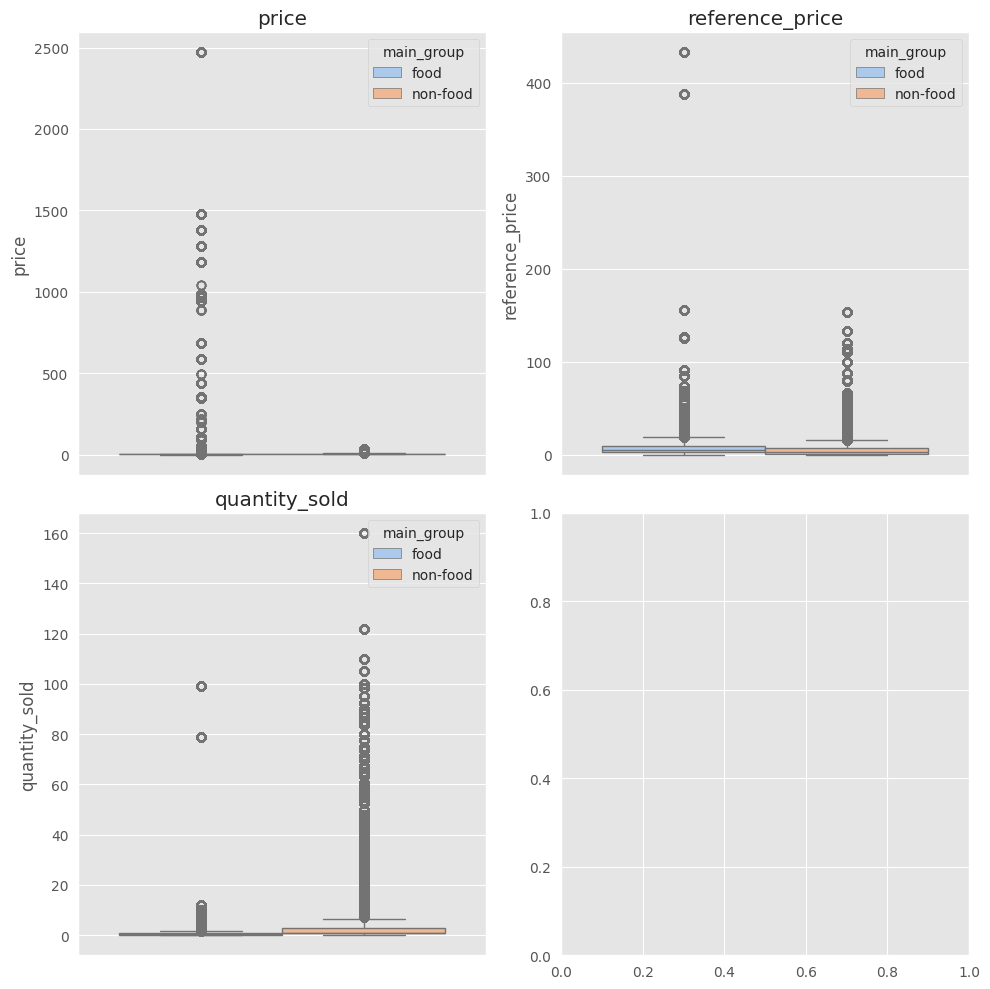

In [18]:
var_num = df[['price', 'reference_price', 'quantity_sold']].columns

nplot = len(var_num)
nrows = 2
cols = nplot // nrows + (nplot % nrows > 0)

fig, axs = plt.subplots(nrows=nrows, ncols=cols, figsize = (10,10))

for i, col in enumerate(var_num):
    ax = axs[i // cols, i % cols] if nrows > 1 else axs[i % cols]
    sns.boxplot(data=df, y=col, ax=ax, hue= 'main_group', palette= 'pastel')
    ax.set_title(col)

plt.tight_layout()
plt.show()

# 3.8. Hallamos la tasa de porcentaje de food en el mercadona

---

In [19]:
# Transformamos nuestra columna 'main_group' a una columna binaria usando mapping
mapping = {'food': 1, 'non-food': 0}
df['main_group_binary'] = df['main_group'].map(mapping)

In [20]:
total_id = df['id'].nunique()
total_food = df[df['main_group_binary'] == 1]['id'].nunique()
food_rate = total_food / total_id
food_rate_percent = '{:.2%}'.format(food_rate)
print('Tasa de food en Mercadona : ',food_rate_percent)

Tasa de food en Mercadona :  64.56%


# 3.9. Análisis específico para responder nuestras preguntas

---

Para responder nuestras dudas usarmos una tabla de contingencia donde especifique nuestros valores a resolver, aquí podemos terminar haciendo un merge con el main group que ya lo hemos especificado cuidadosamente con cada categoria de cada artículo. Con esto queremos decir que buscaremos tambien cuanto representa el food y non food de los articulos de un mercadona.

Pregunta : ¿Cuales es el top 10 de categorias que mas se vende en el mercadona?

In [21]:
cont_categoria = df.groupby('category')['price'].sum().sort_values(ascending=False).reset_index()
cont_categoria.set_index('category', inplace= True)
cont_categoria['percentil'] = (cont_categoria['price']/cont_categoria['price'].sum())*100
cont_categoria['percentil'] = cont_categoria['percentil'].round(2)
top_categoria = cont_categoria.head(10)
top_categoria

,price,percentil
category,,
marisco,2684350.29,43.92
perfume_y_colonia,255073.43,4.17
pescado_fresco,255052.87,4.17
jamon_serrano,207334.64,3.39
licores,126463.45,2.07
coloracion_cabello,107074.10,1.75
verdura,78480.20,1.28
leche_y_bebidas_vegetales,72888.01,1.19
bases_de_maquillaje_y_corrector,68712.25,1.12


<Figure size 1000x1000 with 0 Axes>

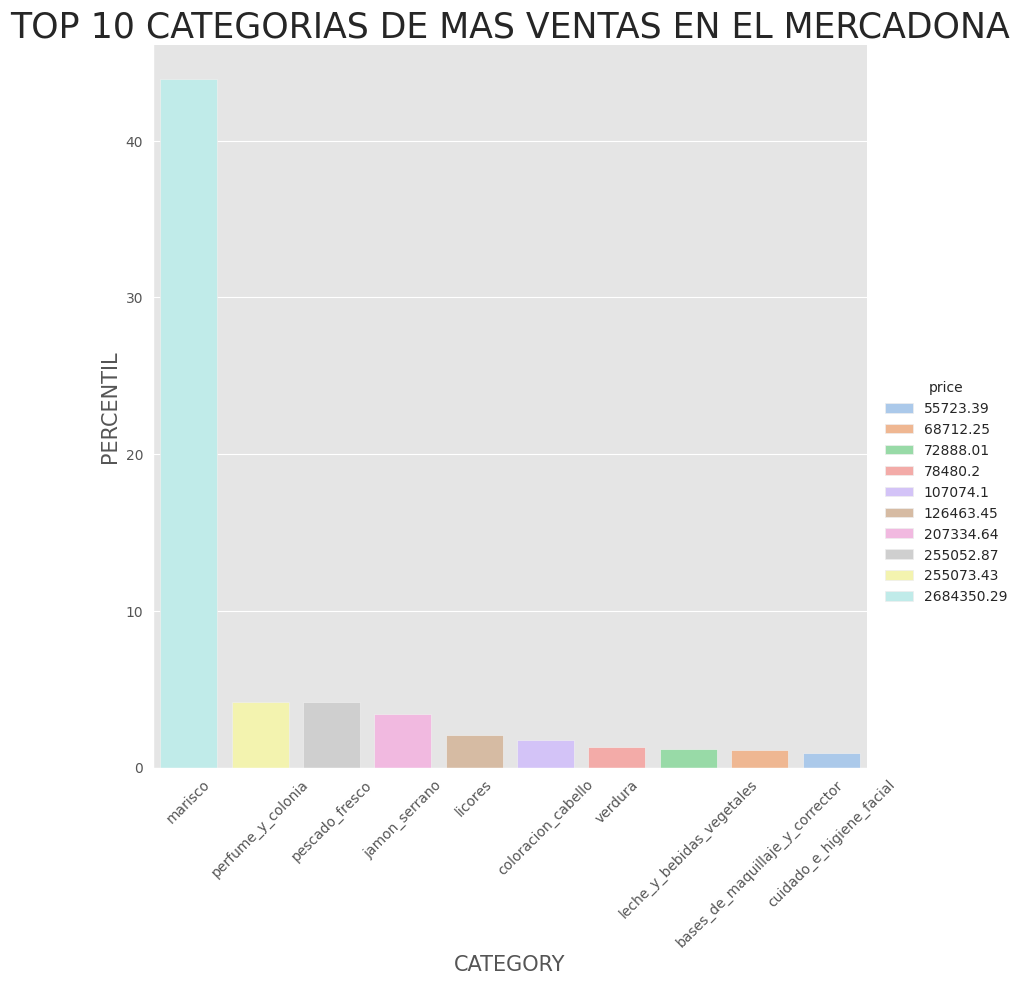

In [22]:
plt.figure(figsize=(10,10))
sns.catplot(data = top_categoria, x = 'category', y = 'percentil', kind= 'bar', palette= 'pastel', height=8, hue = 'price')
plt.title('TOP 10 CATEGORIAS DE MAS VENTAS EN EL MERCADONA', fontsize = 25, y = 1.0)
plt.ylabel('PERCENTIL', fontsize = 15)
plt.xlabel('CATEGORY', fontsize = 15)
plt.xticks(rotation = 45)
plt.show()

Pregunta : ¿TOP 10 de artículos con mas ingresos?

In [23]:
cont_art = df.groupby('name').agg({'price': 'sum','quantity_sold': 'sum'}).round(2).sort_values(by = 'price', ascending=False).reset_index()
cont_art.set_index('name', inplace= True)
cont_art['percentil'] = (cont_art['price']/cont_art['price'].sum())*100
cont_art['percentil'] = cont_art['percentil'].round(2)
top_art = cont_art.head(10)
top_art

,price,quantity_sold,percentil
name,,,
Alistado mediano congelado,703964.25,28215.0,11.52
Bocas chicas de cangrejos congeladas,421814.25,28215.0,6.90
Cuerpos chicos de cangrejo Dimarosa congelados,393599.25,28215.0,6.44
Gamba arrocera congelada,337169.25,28215.0,5.52
Langostino crudo ultracongelado,268042.50,28215.0,4.39
Alistado pequeño congelado,247435.65,19107.0,4.05
Langostino cocido,128249.85,12942.0,2.10
Langostino crudo extra ultracongelado,111003.75,11385.0,1.82
Morralla,105271.65,15147.0,1.72


<Figure size 1000x1000 with 0 Axes>

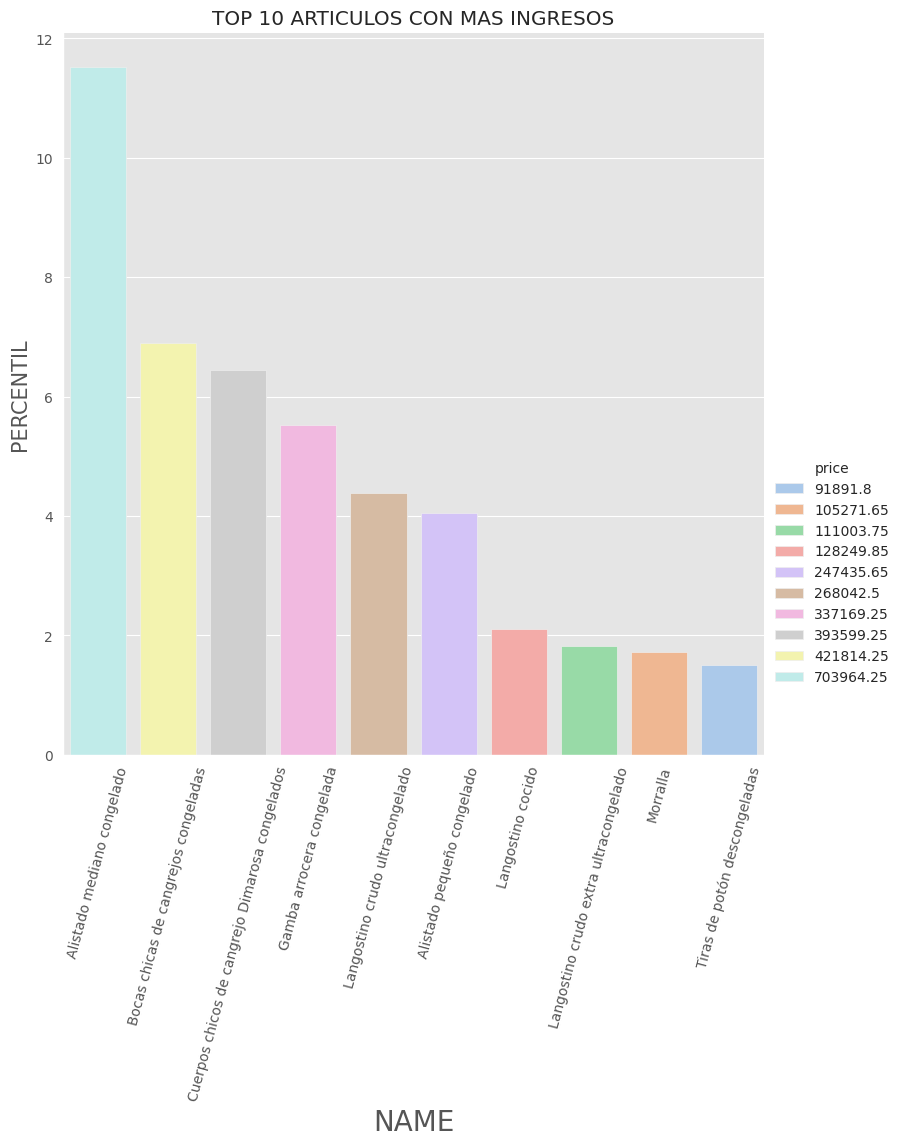

In [24]:
plt.figure(figsize=(10,10))
sns.catplot(data = top_art, x = 'name', y ='percentil', hue = 'price', kind = 'bar', palette = 'pastel', height=8)
plt.title('TOP 10 ARTICULOS CON MAS INGRESOS')
plt.ylabel('PERCENTIL', fontsize = 15)
plt.xlabel('NAME', fontsize = 20)
plt.xticks(rotation = 75)
plt.show()

Pregunta : ¿TOP 10 de artículos más vendidos?

In [25]:
df_quant = df.groupby('name').agg({'price' : 'sum', 'quantity_sold' : 'sum'}).sort_values(by = 'quantity_sold', ascending= False).reset_index()
df_quant.set_index('name', inplace= True)
df_quant['percentil'] = (df_quant['quantity_sold']/df_quant['quantity_sold'].sum())*100
df_quant['percentil'] = df_quant['percentil'].round(2)
top_quanty = df_quant.head(10)
top_quanty

,price,quantity_sold,percentil
name,,,
Pañuelos de papel extra suaves Bosque Verde,288.60,28860.0,1.02
Papel higiénico húmedo WC Bosque Verde,666.90,28372.5,1.00
Alistado mediano congelado,703964.25,28215.0,1.00
Langostino crudo ultracongelado,268042.50,28215.0,1.00
Gamba arrocera congelada,337169.25,28215.0,1.00
Cuerpos chicos de cangrejo Dimarosa congelados,393599.25,28215.0,1.00
Bocas chicas de cangrejos congeladas,421814.25,28215.0,1.00
Papel higiénico húmedo WC infantil Bosque Verde,501.35,25067.5,0.89
Servilleta papel cocktail Bosque Verde,249.60,24960.0,0.88


<Figure size 1000x1000 with 0 Axes>

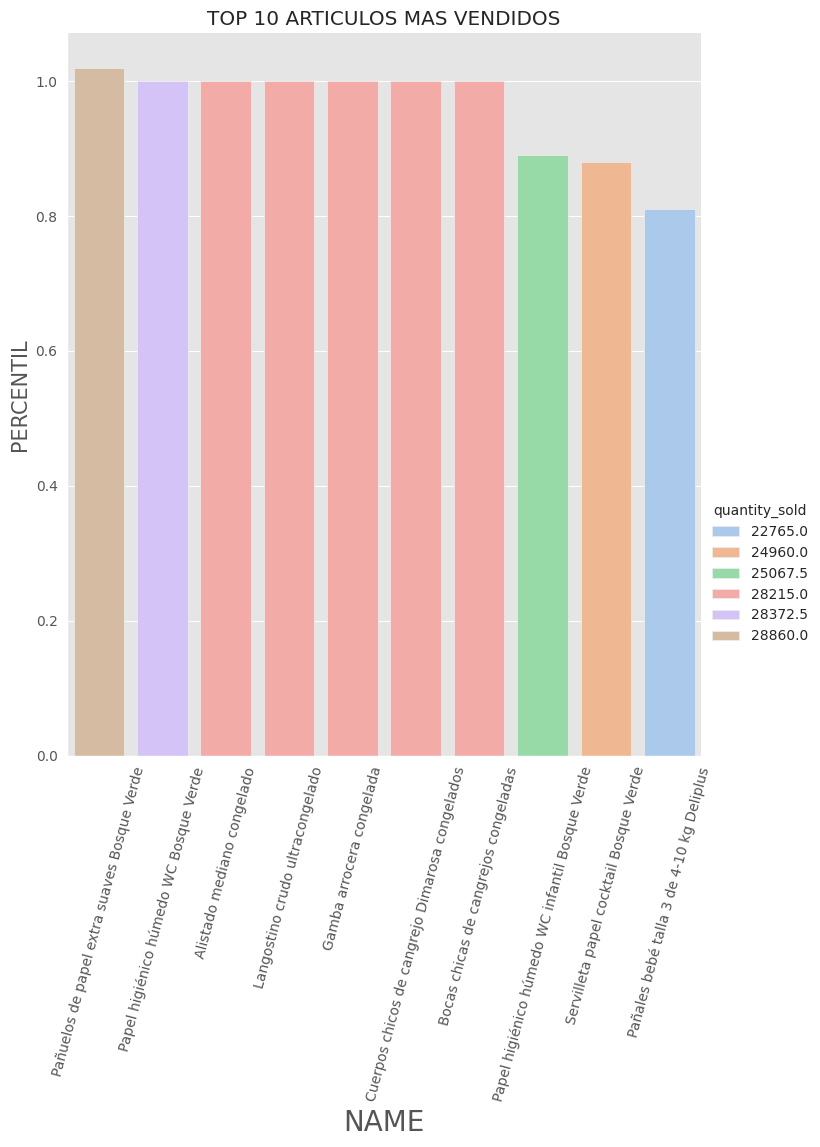

In [26]:
plt.figure(figsize=(10,10))
sns.catplot(data = top_quanty, x = 'name', y = 'percentil', hue = 'quantity_sold', kind = 'bar', palette= 'pastel', height= 8)
plt.title('TOP 10 ARTICULOS MAS VENDIDOS')
plt.ylabel('PERCENTIL', fontsize = 15)
plt.xlabel('NAME', fontsize = 20)
plt.xticks(rotation = 75)
plt.show()

Relación de los productos con más ingresos y los productos más vendidos

In [27]:
cont_val = df.groupby(['name', 'category', 'reference_price']).agg({'price' : 'sum', 'quantity_sold' : 'sum'}).sort_values(by = 'quantity_sold', ascending= False).reset_index()
cont_val.head()

,name,category,reference_price,price,quantity_sold
0,Pañuelos de papel extra suaves Bosque Verde,papel_higienico_y_celulosa,0.01,286.75,28675.0
1,Alistado mediano congelado,marisco,24.95,699024.15,28017.0
2,Cuerpos chicos de cangrejo Dimarosa congelados,marisco,13.95,390837.15,28017.0
3,Langostino crudo ultracongelado,marisco,9.50,266161.50,28017.0
4,Bocas chicas de cangrejos congeladas,marisco,14.95,418854.15,28017.0


In [28]:
cont_qty = df.groupby(['name', 'category', 'reference_price']).agg({'price' : 'sum', 'quantity_sold' : 'sum'}).sort_values(by = 'price', ascending= False).reset_index()
cont_qty.head()

,name,category,reference_price,price,quantity_sold
0,Alistado mediano congelado,marisco,24.95,699024.15,28017.0
1,Bocas chicas de cangrejos congeladas,marisco,14.95,418854.15,28017.0
2,Cuerpos chicos de cangrejo Dimarosa congelados,marisco,13.95,390837.15,28017.0
3,Gamba arrocera congelada,marisco,11.95,334803.15,28017.0
4,Langostino crudo ultracongelado,marisco,9.50,266161.50,28017.0


Pregunta : ¿El porcentaje de productos 'food' vendidos es proporcional a sus ventas?

In [29]:
cont_food = df.groupby('main_group').agg({'price' : 'sum', 'quantity_sold' : 'sum'}).sort_values(by = 'price', ascending = False).reset_index()
cont_food['percentil'] = (cont_food['price']/cont_food['price'].sum())*100
cont_food['percentil'] = cont_food['percentil'].round(2)
cont_food

,main_group,price,quantity_sold,percentil
0,food,4778114.34,716104.361,78.17
1,non-food,1334396.42,2110346.641,21.83


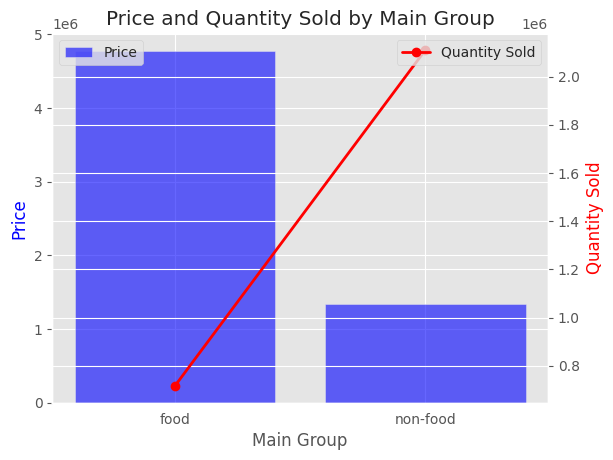

In [30]:
# Configurar el gráfico de barras
fig, ax1 = plt.subplots()

# Eje x
main_groups = cont_food['main_group']

# Eje y para 'price'
price = cont_food['price']
ax1.bar(main_groups, price, color='b', alpha=0.6, label='Price', align='center')

# Eje y para 'quantity_sold', utilizando el mismo eje x pero diferente eje y
ax2 = ax1.twinx()
quantity_sold = cont_food['quantity_sold']
ax2.plot(main_groups, quantity_sold, color='r', marker='o', linestyle='-', linewidth=2, label='Quantity Sold')

# Etiquetas y título
ax1.set_xlabel('Main Group')
ax1.set_ylabel('Price', color='b')
ax2.set_ylabel('Quantity Sold', color='r')
ax1.set_title('Price and Quantity Sold by Main Group')

# Mostrar leyendas
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Mostrar gráfico
plt.show()

Hemos creado una tabla de contingencia para cada una de nuestras preguntas, con esto estamos solventando nuestras dudas, pero mas que ello, estas visualizaciones no estan ayudando para un mejor analisis como una mejor toma decisiones a futuro. Lo que nos percatamos al momento de realizar nuestro análisis, es que no se puede solamente sacar la tabla de contingencia con solamente la cantidad vendida, también lo hacemos para el 'price' que no es mas que las ventas.

Esto lo hacemos para un comparandum, de entre lo mas vendido con lo que mas ingreso genera. Terminado esto veremos en un gráfico las ventas del mercadona dividido entre lo comestible y no, acompañado de una gráfica lineal sobre la cantidad vendida, porque puede ser que uno se venda mas que otro pero no genere el mismo ingreso, esto puede ser por el precio del artículo('referent_price')

# 3.10. Informe sobre el analisis de venta en productos comestibles del mercadona

---

Hasta el momento hemos realizado distintos análisis de lo cual empezamos por nuestras dimensiones, esto es para poder saber que tamaño de datos me estoy enfrentando, de lo cual son 1003020 observaciones con 8 variables. Aca hicimos nuestro primer arreglo, que era separar las columnas de la hora, esto para fines del proyecto.

Así mismo pudimos observar que en el mercadona hubo un 64.56 % de transacciones, pero eso no significa que sean la mayor cantidad vendida o represente la mayor venta, eso es lo que demostramos en el último gráfico.

Por mas que hubo mas transacciones de 'food', lo que mayor se vendio fue 'noon-food', pero el que mas ventas respresentó fue el 'food', esto viendo mas a detalle fue por la referencia de precio que tienen estos artículos.

# 4.0. ENTRENAMIENTO Y TESTEO

---

# 4.1. División de datos
---

In [31]:
X = df[['price', 'reference_price', 'month', 'week']]  # Características
y = df['quantity_sold']  # Variable objetivo

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4.2. Entrenamiento y evaluación del modelo
---

Fueron tres los modelos elegidos para nuestro proyecto:

- Arbol de decisión

- Regresion Lineal

- Regresion Ridge

## 4.2.1. Modelo de arbol de decision

In [32]:
# Entrenar el modelo de regresión lineal
dt = DecisionTreeRegressor(random_state = 42)
dt.fit(X_train, y_train)

# Hacer predicciones
y_pred = dt.predict(X_test)

# Evaluar el modelo
mse = (mean_squared_error(y_test, y_pred)).round(6)
r2 = r2_score(y_test, y_pred)
print("Error cuadrático medio:", mse)
print("Coeficiente de determinación (R²) del modelo de regresión lineal:", r2.round(2))

Error cuadrático medio: 0.0
Coeficiente de determinación (R²) del modelo de regresión lineal: 1.0


## 4.2.2. Modelo de regresión lineal

In [33]:
# Entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Error cuadrático medio:", mse)
print("Coeficiente de determinación (R²) del modelo de regresión lineal:", r2.round(2))

Error cuadrático medio: 85.81524912657392
Coeficiente de determinación (R²) del modelo de regresión lineal: 0.19


## 4.2.3. Modelo de regresión de Ridge

In [34]:
# Modelo
rm = Ridge(alpha=1.0)

# Entrenamiendo
rm.fit(X_train, y_train)

# Predicciones
y_pred = rm.predict(X_test)

# Evaluación
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Error cuadrático medio (MSE) del modelo de árbol de decisión es:', mse.round(2))
print("Coeficiente de determinación (R²) del modelo de árbol de decisión es:", r2.round(2))

Error cuadrático medio (MSE) del modelo de árbol de decisión es: 85.82
Coeficiente de determinación (R²) del modelo de árbol de decisión es: 0.19


# 4.3. Validación cruzada

---

In [36]:
num_folds = 5

kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)

models = [
    ('Regresion Lineal', LinearRegression()),
    ('Arbol de Decision', DecisionTreeRegressor()),
    ('Regresión Ridge', Ridge(alpha=1.0))
]

# Metricas
results = []
names = []
print('Metricas \n----------------------\n')
for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
    results.append(cv_results)
    names.append(name)
    print(f'{name}: {round(cv_results.mean(), 5)} ({round(cv_results.std(), 5)})')

Metricas 
----------------------

Regresion Lineal: -88.57575 (1.49522)
Arbol de Decision: -0.0 (0.0)
Regresión Ridge: -88.57575 (1.49522)


# 5.0. OPTIMIZACIONS Y SELECION DEL MODELO

---

In [37]:
# Hiperparámetros
params = [
    {'Regresion Lineal__fit_intercept': [True, False]},
    {'Arbol de Decision__max_depth': [2, 4, 6],
    'Arbol de Decision__min_samples_split': [2, 4, 6]},
    {'Ridge__alpha': [0.1, 1, 10]}
]

result = []
best_models = []

# Búsqueda de hiperparámetros para cada modelo
models = [
    ('Regresion Lineal', LinearRegression()),
    ('Arbol de Decision', DecisionTreeRegressor()),
    ('Ridge', Ridge())
]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

for i, (name, model) in enumerate(models):
    pipe = Pipeline([(name, model)])
    grid = GridSearchCV(pipe, params[i], cv=5, scoring='neg_mean_squared_error', n_jobs=-1, error_score='raise')
    grid.fit(X_train, y_train)

    best_model = (name, grid.best_estimator_)
    best_score = grid.best_score_
    best_models.append(best_model)
    result.append({'Modelo': name, 'Score': round(best_score, 5), 'Hiperparámetros': grid.best_params_})

    print(name + ':')
    print('Mejores parametros:', grid.best_params_)
    print('Precisión del entrenamiento:', round(grid.best_score_, 5))
    print('Precisión del test:', round(grid.score(X_test, y_test), 5))
    print('--------------------------------------------')

# Ordenamiento de los resultados
result = sorted(result, key=lambda k: k['Score'], reverse=True)
print('Orden de los modelos: ')
for res in result:
    print(res)

Regresion Lineal:
Mejores parametros: {'Regresion Lineal__fit_intercept': True}
Precisión del entrenamiento: -88.58136
Precisión del test: -85.81525
--------------------------------------------
Arbol de Decision:
Mejores parametros: {'Arbol de Decision__max_depth': 6, 'Arbol de Decision__min_samples_split': 4}
Precisión del entrenamiento: -2.70002
Precisión del test: -2.63957
--------------------------------------------
Ridge:
Mejores parametros: {'Ridge__alpha': 10}
Precisión del entrenamiento: -88.58136
Precisión del test: -85.81525
--------------------------------------------
Orden de los modelos: 
{'Modelo': 'Arbol de Decision', 'Score': -2.70002, 'Hiperparámetros': {'Arbol de Decision__max_depth': 6, 'Arbol de Decision__min_samples_split': 4}}
{'Modelo': 'Regresion Lineal', 'Score': -88.58136, 'Hiperparámetros': {'Regresion Lineal__fit_intercept': True}}
{'Modelo': 'Ridge', 'Score': -88.58136, 'Hiperparámetros': {'Ridge__alpha': 10}}


In [41]:
best_model = DecisionTreeRegressor(max_depth=6, min_samples_split=2)

# Entrenar el mejor modelo con todos los datos de entrenamiento
best_model.fit(X_train, y_train)

# Guardar el modelo entrenado
joblib.dump(best_model, 'best_model.pkl')

# Cargar el modelo guardado
loaded_model = joblib.load('best_model.pkl')

# Hacer predicciones con el modelo cargado
predictions = loaded_model.predict(X_test)

# Evaluar el modelo con MSE
mse = mean_squared_error(y_test, predictions)
print(f'MSE on test set: {mse}')

# Evaluar el modelo con MAE y R²
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
print(f'MAE on test set: {mae}')
print(f'R² on test set: {r2}')

MSE on test set: 2.6395730342807897
MAE on test set: 0.5522479069048742
R² on test set: 0.9749769860868606


# 6.0. CONCLUSIÓN

---

Este proyecto fue muy interesante para mi crecimiento personal y profesional, de lo cual rescato lo aprendido, lo puesto en practica. Hemos demostrado que no toda transacción realizado significa una mayor venta, o una mayor ganancia. Con esto hemos hecho que el que pueda ver este proyecto, pueda ponerlo en practica en su empresa y buscar opciones para poder revertir o mejorar ese numero.

También para saber donde puede atacar y donde debe de reforzar. Hemos aplicado 3 modelos de aprendizaje, mas aun cuando el data set nos obligaba por decirlo así a inclinarnos por el de regresión lineal. Lo cual demostramos que no fue así.

En conclusión, este proyecto pudo determinar un modelo de aprendizaje el cual asemeja tanto sus valores predicho con los reales, estos es muy bueno; ya que demuestra lo eficiente del modelo.